<a href="https://colab.research.google.com/github/Vineetttt/MachineLearning-II/blob/main/Delta_Learning_Runing_using_Stochastic_and_Batch_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import matplotlib.pyplot as plt

In [184]:
def sigmoid(y_in):
  y_hat = 1 / (1 + np.exp(-y_in))
  return y_hat

In [185]:
def perceptron(x,w,b):
  y_in = x*w + b
  y_hat = sigmoid(y_in)
  return y_hat

In [186]:
def delta_w(x,y,w,b,c):
  y_hat = perceptron(x,w,b)
  dw = c*(y-y_hat)*y_hat*(1-y_hat)*x
  return dw

In [187]:
def delta_b(x,y,w,b,c):
  y_hat = perceptron(x,w,b)
  db = c*(y-y_hat)*y_hat*(1-y_hat)
  return db

In [188]:
def loss(X,Y,w,b):
  total_loss = 0
  for x,y in zip(X,Y):
    y_hat = perceptron(x,w,b)
    total_loss += (y-y_hat)**2
  return total_loss/6

Stochastic Gradient Descent

In [189]:
def stochastic_method(X,Y,w,b,epoch,c):
  weights = []
  biases = []
  losses = []
  for i in range(epoch):
    db,dw = 0, 0
    for x,y in zip(X,Y):
      dw += delta_w(x,y,w,b,c)
      db += delta_b(x,y,w,b,c)
      w = w + dw
      b = b + db
      weights.append(w)
      biases.append(b)
    losses.append(loss(X,Y,w,b))
  print("for x = 0.5, stochastic gives: ", perceptron(0.5,w,b))
  return weights, biases, losses

Batch Gradient Descent

In [190]:
def batch_method(X,Y, w, b, epoch, c):
  weights = []
  biases = []
  losses = []
  for i in range(epoch):
    db,dw = 0, 0
    for x,y in zip(X,Y):
      dw += delta_w(x,y,w,b,c)
      db += delta_b(x,y,w,b,c)
    w = w + dw
    b = b + db
    weights.append(w)
    biases.append(b)
    losses.append(loss(X,Y,w,b))
  print("for x = 0.5, batch gives: ", perceptron(0.5,w,b))
  return weights, biases, losses

In [191]:
X = [0.5, 2.5]
Y = [0.2, 0.9]
w = 1
b = 0
epoch = 10
c = 2

In [192]:
sw_new,sb_new,slosses = stochastic_method(X,Y,w,b,epoch,c)
bw_new,bb_new,blosses = batch_method(X,Y,w,b,epoch,c)

for x = 0.5, stochastic gives:  0.3006748225974409
for x = 0.5, batch gives:  0.3709222069454312


In [193]:
print("Stochastic Final Weight: ",sw_new[-1])
print("Stochastic Final Bias: ",sb_new[-1])

Stochastic Final Weight:  1.1731932488083001
Stochastic Final Bias:  -1.4306831050053412


In [194]:
print("Batch Final Weight: ",bw_new[-1])
print("Batch Final Bias: ",bb_new[-1])

Batch Final Weight:  0.9856046304378753
Batch Final Bias:  -1.0210648857869176


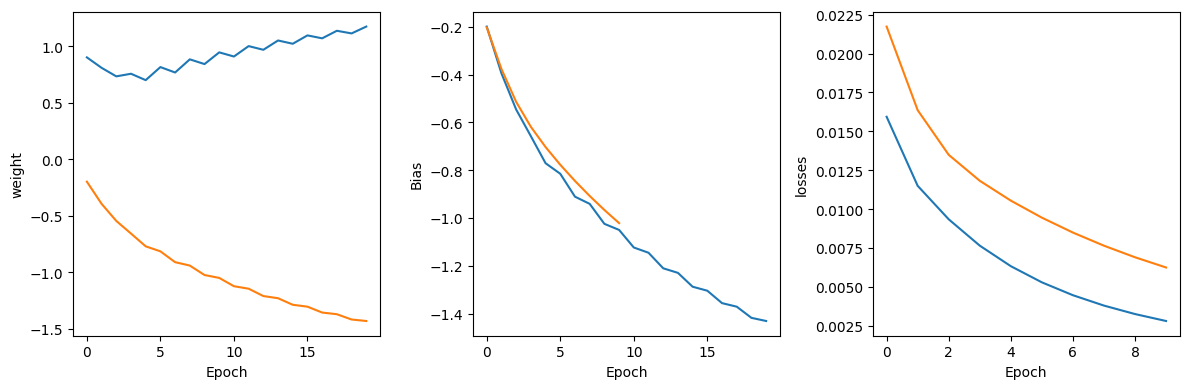

In [195]:
#plot weights
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(sw_new, label='stochastic')
plt.plot(sb_new, label='Batch')
plt.xlabel("Epoch")
plt.ylabel('weight')
plt.legend

#plot Biases
plt.subplot(132)
plt.plot(sb_new, label='stochastic')
plt.plot(bb_new, label='Batch')
plt.xlabel("Epoch")
plt.ylabel('Bias')
plt.legend

#plot Losses
plt.subplot(133)
plt.plot(slosses, label='stochastic')
plt.plot(blosses, label='Batch')
plt.xlabel("Epoch")
plt.ylabel('losses')
plt.legend

plt.tight_layout()
plt.show()

Actual Y values:  [0.2, 0.9]
Stochastic predictions:  [0.3006748225974409, 0.8179172650379544]
batch_predictions:  [0.3709222069454312, 0.8089105486072655]


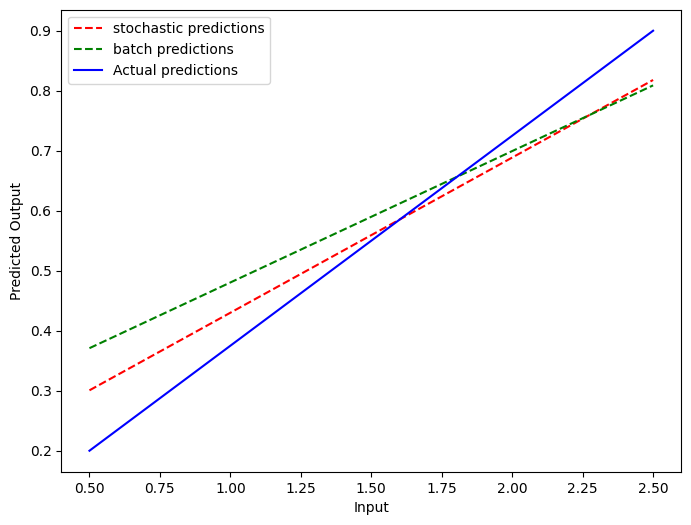

In [196]:
X_test = [0.5, 2.5]
Y_test = [0.2, 0.9]

def predict(x,w,b):
  y_hat = perceptron(x,w,b)
  return y_hat

stochastic_predictions = [predict(x,sw_new[-1], sb_new[-1]) for x in X_test]
batch_predictions = [predict(x, bw_new[-1], bb_new[-1])for x in X_test]

print("Actual Y values: ", Y_test)
print("Stochastic predictions: ", stochastic_predictions)
print("batch_predictions: ",batch_predictions)

plt.figure(figsize=(8,6))
plt.plot(X_test, stochastic_predictions, label="stochastic predictions", color='red', linestyle = '--')
plt.plot(X_test, batch_predictions, label='batch predictions', color='green', linestyle='--')
plt.plot(X_test, Y_test, label='Actual predictions', color='blue')

plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.legend()
plt.show()